# Wrangle and Analyze Data 

## Gathering Data

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy 
from timeit import default_timer as timer
import wptools
import json
import os
import glob
import time
import matplotlib.pyplot as plt
%matplotlib inline

### df_archive

In [2]:
df_archive= pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### df_images

In [3]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r= requests.get(url)
with open ('image-predictions.tsv', mode= 'wb') as f:
    f.write(r.content) 
    
df_images = pd.read_csv('image-predictions.tsv', sep = '\t') 
df_images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### df_json

In [4]:
df_json= []
for line in open('tweet-json.txt', 'r'):
    df_json.append(json.loads(line))

In [5]:
df_tweet= pd.DataFrame(columns = ['tweet_id', 'retweet_count', 'favorite_count'])
for i in df_json:
    df_tweet.loc[len(df_tweet)]=[i['id_str'], i['retweet_count'], i['favorite_count']]
    
df_tweet.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


### API

In [6]:
consumer_key = 'Consumer Key'
consumer_secret = 'Consumer Secret'
access_token = 'Access Token'
access_secret = 'Access Secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

## Assessing Data:

### df_archive

In [8]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_archive.shape

(2356, 17)

In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
sum(df_archive.duplicated())

0

In [12]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

### df_archive Assessment:

#### Tidiness
1- drop unneccessary cols
2- combine 4 cols of dog stages into 1 col 'Stage', then drop these 4 cols
3- split timestamp col into 'date' and 'time'
4- reorder cols

#### Quality:
1- convert variables ('tweet_id', 'dog_stage') to str
2- determin 'date' and 'time'  as datetime
3- delete unneccessary charachters from source 
4- doges names not accurated
5- Calulate the value of rating

### df_images

In [18]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
df_images.shape

(2075, 12)

In [20]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
sum(df_images.duplicated())

0

In [23]:
df_images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
df_images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [25]:
df_images.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
miniature_pinscher                 20
malinois                           20
chow                               20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [26]:
df_images.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

### df_images Assessment:

#### Tidiness:
1- combine cols of p1, p2 and p3 under 'Predictions', then drop these cols.

#### Quality:
1- convert 'img_num' to int and 'tweet_id' to str
2- remove '_' in 'Predictions'
3- convert lower case to upper case in 'Predictions'
4- removing the tweets without images

### df_tweet

In [27]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [28]:
df_tweet.shape

(2354, 3)

In [29]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


In [30]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,741793263812808706,3652,0
freq,1,5,179


In [31]:
df_tweet.duplicated().sum()

0

In [32]:
df_tweet.retweet_count.mean(), df_tweet.retweet_count.max(), df_tweet.retweet_count.min()

(3164.7973661852166, 79515, 0)

In [33]:
df_tweet.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [34]:
df_tweet.retweet_count.sort_values()

290         0
1293        2
273         3
341         3
112         3
29          4
1078        6
54          7
426        10
63         10
2296       14
2337       16
185        17
1521       19
178        20
2317       23
211        23
2187       25
1235       26
187        27
408        31
100        31
610        32
2258       34
2222       34
2257       37
2335       37
284        38
883        38
965        39
        ...  
309     24013
528     24069
449     24069
1075    24319
888     24319
653     24514
1623    24514
117     25661
168     25661
114     27680
623     27728
1764    30742
458     31314
302     31314
1828    31989
134     32883
131     32883
868     33421
164     33421
536     37911
154     37911
445     42228
448     42228
65      45849
412     48265
816     52360
1077    52360
259     56625
533     56625
1037    79515
Name: retweet_count, Length: 2354, dtype: object

### df_tweet Assessment:

#### Tidiness:
N/A

#### Quality:
convert favorite_count and retweet_count into int

## Cleaning Data:

In [42]:
# copy dfs:
df_archive_clean= df_archive.copy()
df_images_clean= df_images.copy()
df_tweet_clean= df_tweet.copy()

### df_archive

In [36]:
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Tidiness:

In [43]:
# define: drop unneccessary cols
# code:
df_archive_clean= df_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis= 1)
# test:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [44]:
# define: combine 4 cols of dog stages into 1 col 'dog_status', then drop these 4 cols
# code:
dog_status = []
for index, row in df_archive_clean.iterrows(): # for each row in the dataframe
    status = list(set([row.doggo, row.floofer, row.pupper, row.puppo])) # make a list of all the 4 values present
    status.pop(status.index("None")) # remove non from the list
    status = ",".join(status) if len(status)!=0 else "None"  # if value not None then join by comma else nothing
    dog_status.append(status)

df_archive_clean["dog_status"] = dog_status[:] # set the final value

In [45]:
# drop 4 cols of dog stages
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [46]:
# test:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_status            2356 non-null object
dtypes: int64(3), object(5)
memory usage: 147.3+ KB


In [47]:
df_archive_clean.dog_status.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_status, dtype: int64

In [48]:
# define: split timestamp col into 'date' and 'time'
# code:
df_archive_clean= df_archive_clean[df_archive_clean.timestamp != ' ']
df_archive_clean['date'], df_archive_clean['time']= df_archive_clean['timestamp'].str.split(' ', 1).str
# drop 'timestamp'
df_archive_clean= df_archive_clean.drop(['timestamp'], axis= 1)
# test:
df_archive_clean.head(3)

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_status,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,2017-08-01,16:23:56 +0000
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,2017-08-01,00:17:27 +0000
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,2017-07-31,00:18:03 +0000


#### Quality:

In [49]:
# define: convert variables ('tweet_id', 'dog_stage') to str
# code:
df_archive_clean.tweet_id= df_archive_clean.tweet_id.astype(str)
df_archive_clean.dog_status= df_archive_clean.dog_status.astype(str)
# test:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_status            2356 non-null object
date                  2356 non-null object
time                  2356 non-null object
dtypes: int64(2), object(7)
memory usage: 184.1+ KB


In [50]:
# define: determin 'date' and 'time' as datetime
# code:
df_archive_clean.date= pd.to_datetime(df_archive_clean.date)
df_archive_clean.time= pd.to_datetime(df_archive_clean.time)
# test:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_status            2356 non-null object
date                  2356 non-null datetime64[ns]
time                  2356 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 184.1+ KB


In [51]:
# define: delete unneccessary charachters from source col
# code:
df_archive_clean.source= df_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
# test:
df_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [52]:
# define: doges names not accurated
# code:
name_list= ['a', 'the', 'an', 'old', 'this', 'such', 'quite', 'light', 'life', 'by', 'actually', 'just', 'getting', 'infuriating', 'all', 'very', 'mad', 'not', 'one', 'my']

df_archive_clean['name'].replace(name_list, 'None', inplace= True)
df_archive_clean['name'].replace('O', "O'Malley", inplace= True)
# test:
df_archive_clean.name.value_counts()

None       849
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Bo           9
Winston      9
Sadie        8
Daisy        7
Toby         7
Bailey       7
Buddy        7
Stanley      6
Koda         6
Jax          6
Dave         6
Milo         6
Oscar        6
Bella        6
Scout        6
Jack         6
Leo          6
Rusty        6
Alfie        5
Phil         5
Sunny        5
Larry        5
          ... 
Pinot        1
Vince        1
Ember        1
Spencer      1
Pumpkin      1
Rumble       1
Taz          1
Sora         1
Nimbus       1
Billl        1
Jim          1
Karma        1
Bert         1
Murphy       1
Billy        1
Jessiga      1
Mya          1
Herb         1
Clarq        1
Kayla        1
Andru        1
Pip          1
Nugget       1
Mauve        1
Timofy       1
Brockly      1
Kota         1
Howie        1
Huxley       1
Dook         1
Name: name, Length: 937, dtype: int64

In [53]:
# define: Calulate the value of rating
# code:
df_archive_clean['rating'] = df_archive_clean['rating_numerator'] / df_archive_clean['rating_denominator']
# drop cols
df_archive_clean= df_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis= 1)
# test:
df_archive_clean.head(2)

,tweet_id,source,text,name,dog_status,date,time,rating
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,2017-08-01,2019-02-02 16:23:56,1.3
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,None,2017-08-01,2019-02-02 00:17:27,1.3


In [54]:
# define: reorder cols
# code:
ordered_cols = ['tweet_id', 'name', 'dog_status', 'text', 'date', 'time', 'rating', 'source']
               
df_archive_clean = df_archive_clean.reindex(columns=ordered_cols)
# test
df_archive_clean.columns

Index(['tweet_id', 'name', 'dog_status', 'text', 'date', 'time', 'rating',
       'source'],
      dtype='object')

In [55]:
df_archive_clean.head(2)

,tweet_id,name,dog_status,text,date,time,rating,source
0,892420643555336193,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,2017-08-01,2019-02-02 16:23:56,1.3,Twitter for iPhone
1,892177421306343426,Tilly,None,This is Tilly. She's just checking pup on you....,2017-08-01,2019-02-02 00:17:27,1.3,Twitter for iPhone


### df_images

#### Tidiness:

In [56]:
df_images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [57]:
# define: combine cols of p1, p2 and p3 under 'Prediction', then drop these cols.
# code:
prediction = []
confidence= []

def pred_conf(row):
    if row['p1_dog']:
        prediction.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog']:
        prediction.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog']:
        prediction.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        prediction.append('None')
        confidence.append(0)

df_images_clean.apply(pred_conf, axis = 1)

df_images_clean['Predictions'] = prediction
df_images_clean['Confidence'] = confidence
# drop cols
df_images_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

# test:
df_images_clean.head(3)

,tweet_id,jpg_url,img_num,Predictions,Confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461


#### Quality:

In [58]:
# define: convert 'img_num' to int and 'tweet_id' to str
# code:
df_images_clean.img_num= df_images_clean.img_num.astype(int)
df_images_clean.tweet_id= df_images_clean.tweet_id.astype(str)
# test:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id       2075 non-null object
jpg_url        2075 non-null object
img_num        2075 non-null int64
Predictions    2075 non-null object
Confidence     2075 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.1+ KB


In [59]:
# define: remove '_' in 'Predictions'
# code:
df_images_clean.Predictions = df_images_clean.Predictions.str.replace('_', ' ')
# test:
df_images_clean.Predictions.value_counts()

None                              324
golden retriever                  173
Labrador retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker spaniel                     34
French bulldog                     32
Chesapeake Bay retriever           31
miniature pinscher                 26
Cardigan                           23
Staffordshire bullterrier          22
Eskimo dog                         22
German shepherd                    21
beagle                             21
Siberian husky                     20
Shih-Tzu                           20
Shetland sheepdog                  19
Maltese dog                        19
Rottweiler                         19
kuvasz                             19
Lakeland ter

In [60]:
# define: convert lower case to upper case in 'Predictions'
# code:
df_images_clean.Predictions= df_images_clean.Predictions.str.upper()
# test:
df_images_clean.Predictions

0            WELSH SPRINGER SPANIEL
1                           REDBONE
2                   GERMAN SHEPHERD
3               RHODESIAN RIDGEBACK
4                MINIATURE PINSCHER
5              BERNESE MOUNTAIN DOG
6                              NONE
7                              CHOW
8                  GOLDEN RETRIEVER
9                  MINIATURE POODLE
10                 GOLDEN RETRIEVER
11                    GORDON SETTER
12                     WALKER HOUND
13                              PUG
14                       BLOODHOUND
15                            LHASA
16                   ENGLISH SETTER
17                             NONE
18                             NONE
19                ITALIAN GREYHOUND
20                      MALTESE DOG
21                             NONE
22                     NEWFOUNDLAND
23                 GOLDEN RETRIEVER
24                         MALAMUTE
25                             NONE
26      SOFT-COATED WHEATEN TERRIER
27                        CH

In [61]:
# define: removing the tweets without images
# code:
df_images_clean = df_images_clean[pd.notnull(df_images_clean['jpg_url'])]
# test
df_images_clean.jpg_url.shape

(2075,)

### df_tweet

In [62]:
df_tweet_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Tidiness:

N/A

#### Quality:

In [63]:
# define: convert favorite_count and retweet_count into int 
# code:
df_tweet_clean.favorite_count.astype(int)
df_tweet_clean.retweet_count.astype(int)
# test:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


## Combine and Store Final DataFrame:

In [64]:
# define: merge df_tweet_clean to df_archive_clean on 'tweet_id'
# code:
df_clean= pd.merge(df_archive_clean, df_tweet_clean, on= 'tweet_id', how= 'left')
# test:
df_clean

,tweet_id,name,dog_status,text,date,time,rating,source,retweet_count,favorite_count
0,892420643555336193,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,2017-08-01,2019-02-02 16:23:56,1.3,Twitter for iPhone,8853,39467
1,892177421306343426,Tilly,None,This is Tilly. She's just checking pup on you....,2017-08-01,2019-02-02 00:17:27,1.3,Twitter for iPhone,6514,33819
2,891815181378084864,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31,2019-02-02 00:18:03,1.2,Twitter for iPhone,4328,25461
3,891689557279858688,Darla,None,This is Darla. She commenced a snooze mid meal...,2017-07-30,2019-02-02 15:58:51,1.3,Twitter for iPhone,8964,42908
4,891327558926688256,Franklin,None,This is Franklin. He would like you to stop ca...,2017-07-29,2019-02-02 16:00:24,1.2,Twitter for iPhone,9774,41048
5,891087950875897856,None,None,Here we have a majestic great white breaching ...,2017-07-29,2019-02-02 00:08:17,1.3,Twitter for iPhone,3261,20562
6,890971913173991426,Jax,None,Meet Jax. He enjoys ice cream so much he gets ...,2017-07-28,2019-02-02 16:27:12,1.3,Twitter for iPhone,2158,12041
7,890729181411237888,None,None,When you watch your owner call another dog a g...,2017-07-28,2019-02-02 00:22:40,1.3,Twitter for iPhone,16716,56848
8,890609185150312448,Zoey,None,This is Zoey. She doesn't want to be one of th...,2017-07-27,2019-02-02 16:25:51,1.3,Twitter for iPhone,4429,28226
9,890240255349198849,Cassie,doggo,This is Cassie. She is a college pup. Studying...,2017-07-26,2019-02-02 15:59:51,1.4,Twitter for iPhone,7711,32467


In [65]:
# more cleaning testing of df_clean
df_clean.shape

(2356, 10)

In [66]:
# more cleaning testing of df_clean
df_clean.duplicated().sum()

0

In [67]:
# more cleaning testing of df_clean
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id          2356 non-null object
name              2356 non-null object
dog_status        2356 non-null object
text              2356 non-null object
date              2356 non-null datetime64[ns]
time              2356 non-null datetime64[ns]
rating            2356 non-null float64
source            2356 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 202.5+ KB


In [68]:
# define: merge df_images_clean to df_clean on 'tweet_id'
# code:
df_final= pd.merge(df_clean, df_images_clean, on= 'tweet_id', how= 'left')
# test:
df_final

,tweet_id,name,dog_status,text,date,time,rating,source,retweet_count,favorite_count,jpg_url,img_num,Predictions,Confidence
0,892420643555336193,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,2017-08-01,2019-02-02 16:23:56,1.3,Twitter for iPhone,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NONE,0.000000
1,892177421306343426,Tilly,None,This is Tilly. She's just checking pup on you....,2017-08-01,2019-02-02 00:17:27,1.3,Twitter for iPhone,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,CHIHUAHUA,0.323581
2,891815181378084864,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31,2019-02-02 00:18:03,1.2,Twitter for iPhone,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,CHIHUAHUA,0.716012
3,891689557279858688,Darla,None,This is Darla. She commenced a snooze mid meal...,2017-07-30,2019-02-02 15:58:51,1.3,Twitter for iPhone,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,LABRADOR RETRIEVER,0.168086
4,891327558926688256,Franklin,None,This is Franklin. He would like you to stop ca...,2017-07-29,2019-02-02 16:00:24,1.2,Twitter for iPhone,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,BASSET,0.555712
5,891087950875897856,None,None,Here we have a majestic great white breaching ...,2017-07-29,2019-02-02 00:08:17,1.3,Twitter for iPhone,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,CHESAPEAKE BAY RETRIEVER,0.425595
6,890971913173991426,Jax,None,Meet Jax. He enjoys ice cream so much he gets ...,2017-07-28,2019-02-02 16:27:12,1.3,Twitter for iPhone,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,APPENZELLER,0.341703
7,890729181411237888,None,None,When you watch your owner call another dog a g...,2017-07-28,2019-02-02 00:22:40,1.3,Twitter for iPhone,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,POMERANIAN,0.566142
8,890609185150312448,Zoey,None,This is Zoey. She doesn't want to be one of th...,2017-07-27,2019-02-02 16:25:51,1.3,Twitter for iPhone,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,IRISH TERRIER,0.487574
9,890240255349198849,Cassie,doggo,This is Cassie. She is a college pup. Studying...,2017-07-26,2019-02-02 15:59:51,1.4,Twitter for iPhone,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,PEMBROKE,0.511319


In [69]:
# more cleaning testing of df_final
df_final.shape

(2356, 14)

In [70]:
# more cleaning testing of df_final
df_final.duplicated().sum()

0

In [71]:
# more cleaning testing of df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id          2356 non-null object
name              2356 non-null object
dog_status        2356 non-null object
text              2356 non-null object
date              2356 non-null datetime64[ns]
time              2356 non-null datetime64[ns]
rating            2356 non-null float64
source            2356 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
jpg_url           2075 non-null object
img_num           2075 non-null float64
Predictions       2075 non-null object
Confidence        2075 non-null float64
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 276.1+ KB


In [73]:
# define: convert img_num to str datatype
# code:
df_final.img_num= df_final.img_num.astype(str)
# test:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id          2356 non-null object
name              2356 non-null object
dog_status        2356 non-null object
text              2356 non-null object
date              2356 non-null datetime64[ns]
time              2356 non-null datetime64[ns]
rating            2356 non-null float64
source            2356 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
jpg_url           2075 non-null object
img_num           2356 non-null object
Predictions       2075 non-null object
Confidence        2075 non-null float64
dtypes: datetime64[ns](2), float64(2), object(10)
memory usage: 276.1+ KB


In [74]:
# store df_final to CSV file
df_final.to_csv('twitter_archive_master.csv', index=False)

In [75]:
# read saved file to ensure it works
df_final= pd.read_csv('twitter_archive_master.csv')
df_final.head(3)

,tweet_id,name,dog_status,text,date,time,rating,source,retweet_count,favorite_count,jpg_url,img_num,Predictions,Confidence
0,892420643555336193,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 00:00:00,2019-02-02 16:23:56,1.3,Twitter for iPhone,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NONE,0.000000
1,892177421306343426,Tilly,None,This is Tilly. She's just checking pup on you....,2017-08-01 00:00:00,2019-02-02 00:17:27,1.3,Twitter for iPhone,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,CHIHUAHUA,0.323581
2,891815181378084864,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:00:00,2019-02-02 00:18:03,1.2,Twitter for iPhone,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,CHIHUAHUA,0.716012


## Analysis and Visualizations:

#### What is the most source used?

Text(0,0.5,'Number of Dogs')

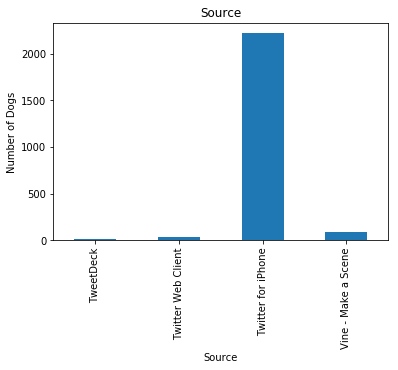

In [76]:
ax = df_final.source.value_counts().sort_index().plot('bar', title = 'Source')
ax.set_xlabel('Source')
ax.set_ylabel('Number of Dogs')

In [ ]:
## As per the above plot, the most source used is iphone source

#### Is there correlation between 'favorite_count' and 'retweet_count'?

Text(0.5,1,'Relationship between Retweets & Likes')

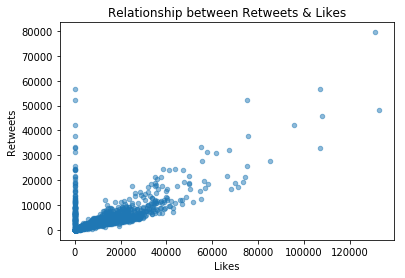

In [77]:
x = df_final.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5)
x.grid(False)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Relationship between Retweets & Likes')

In [ ]:
# The scatter plot shows that there is a positive correlation between retweet_count and favorite_count. Most of correlation between (approx. 0 : 50000) likes and (approx. 0: 20000) retweets

#### What is 'rating' looks like over 'time'?

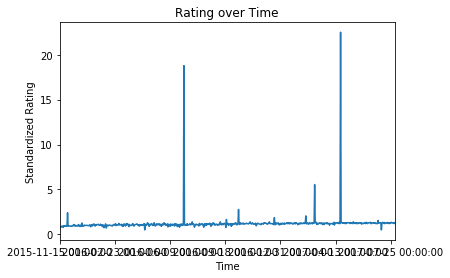

In [78]:
df_final.groupby('date')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

In [ ]:
# As the plot shown, the average rating increased over time.

#### References:
1- GitHub Respositories.
2- YouTube.
3- Stackoverflow.